In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import timeit
import codecs
import re
import os
import time
# These are all the modules we'll be using later. Make sure you can import them
# before proceeding further.
%matplotlib inline
from __future__ import print_function
import collections
import math
import numpy as np
import os
import random
import tensorflow as tf
import zipfile
from matplotlib import pylab
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE

In [23]:
df = pd.read_csv('./dataset/indexBESTplus.csv',encoding='utf-8')

In [24]:
%%time
df['content'] = df['content'].apply(lambda x: x.replace("<NE>","").replace("</NE>","").replace("<AB>","").replace("</AB>","").replace("\r\n",""))
df['tokenized'] = df['content'].apply(lambda x: x.split("|"))

CPU times: user 624 ms, sys: 204 ms, total: 828 ms
Wall time: 827 ms


In [25]:
df['tokenized'].head(30)

0     [﻿, เครื่องมือ, ทุ่น, แรง, และ, เครื่อง, จักรก...
1     [﻿, เมื่อ, ชูชก, เฒ่า, จะ, เดินทาง, ไป, ทูล, ข...
2     [﻿, การ, เลี้ยง, หมู, เป็น, สัตว์, เลี้ยง, ที่...
3     [﻿ลำดับ, พระมหากษัตริย์, ไทย, สมัย, ราชอาณาจัก...
4     [﻿การ, ต่าง, ประเทศ, สมัย, รัตนโกสินทร์, เรา, ...
5     [﻿http://www.bangkokhealth.com/healthnews _ ht...
6     [﻿http://www.bangkokhealth.com/healthnews _ ht...
7     [﻿http://www.bangkokhealth.com/healthnews _ ht...
8     [﻿http://www.bangkokhealth.com/healthnews _ ht...
9     [﻿http://www.bangkokhealth.com/healthnews _ ht...
10    [﻿WWW.KOMCHADLUEK.NET, อคส., เด้ง, ฟ้า, ผ่า, ห...
11    [﻿WWW.KOMCHADLUEK.NET, ", เสี่ยแหลม, ", ลั่น, ...
12    [﻿WWW.KOMCHADLUEK.NET, ระแวง, แฟน, หนุ่ม, หวน,...
13    [﻿WWW.KOMCHADLUEK.NET, 2, พรรค, เขย่า, คมช.,  ...
14    [﻿WWW.KOMCHADLUEK.NET, สตรี, จีน, ติด, อันดับ,...
15    [﻿WWW.KOMCHADLUEK.NET, ควป., จับ, มือ, จคป., ป...
16    [﻿WWW.KOMCHADLUEK.NET,  , ", จ่ายักษ์, ", มอบ,...
17    [﻿WWW.KOMCHADLUEK.NET, จับ, 11, แก๊ง, ปล้น

In [26]:
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s',\
    level=logging.INFO)

# Set values for various parameters
num_features = 500    # Word vector dimensionality                      
min_word_count = 10  # Minimum word count                        
num_workers = 4       # Number of threads to run in parallel
context = 10          # Context window size                                                                                    
downsampling = 1e-3   # Downsample setting for frequent words

# Initialize and train the model (this will take some time)
from gensim.models import word2vec
print("Training model...")
model = word2vec.Word2Vec(df['tokenized'].values, workers=num_workers, \
            size=num_features, min_count = min_word_count, \
            window = context, sample = downsampling)

2017-06-26 22:38:12,503 : INFO : collecting all words and their counts
2017-06-26 22:38:12,504 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types


Training model...


2017-06-26 22:38:14,213 : INFO : collected 81616 word types from a corpus of 5680354 raw words and 509 sentences
2017-06-26 22:38:14,215 : INFO : Loading a fresh vocabulary
2017-06-26 22:38:14,454 : INFO : min_count=10 retains 12037 unique words (14% of original 81616, drops 69579)
2017-06-26 22:38:14,455 : INFO : min_count=10 leaves 5543619 word corpus (97% of original 5680354, drops 136735)
2017-06-26 22:38:14,496 : INFO : deleting the raw counts dictionary of 81616 items
2017-06-26 22:38:14,499 : INFO : sample=0.001 downsamples 50 most-common words
2017-06-26 22:38:14,500 : INFO : downsampling leaves estimated 4038184 word corpus (72.8% of prior 5543619)
2017-06-26 22:38:14,501 : INFO : estimated required memory for 12037 words and 500 dimensions: 54166500 bytes
2017-06-26 22:38:14,553 : INFO : resetting layer weights
2017-06-26 22:38:14,854 : INFO : training model with 4 workers on 12037 vocabulary and 500 features, using sg=0 hs=0 sample=0.001 negative=5 window=10
2017-06-26 22:38

In [27]:
%%time
from sklearn.manifold import TSNE
T_model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
X_reduced = T_model.fit_transform(model.wv.syn0) 

CPU times: user 5min 1s, sys: 51.8 s, total: 5min 53s
Wall time: 5min 29s


In [28]:
X = model.wv.syn0

In [56]:
import matplotlib.font_manager as fm
prop = fm.FontProperties(fname='/usr/share/fonts/truetype/tlwg/Sawasdee-Oblique.ttf')

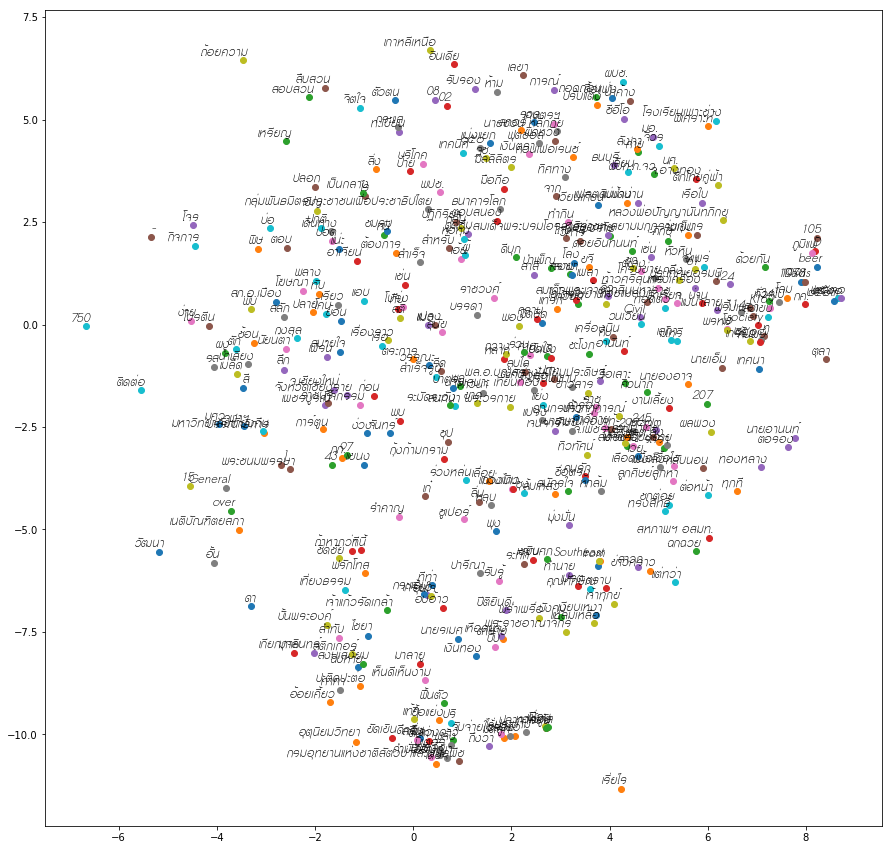

CPU times: user 17.7 s, sys: 20.5 s, total: 38.2 s
Wall time: 14 s


In [58]:
%%time
num_points = 400
from matplotlib import pylab
def plot(labels):
  #assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
  pylab.figure(figsize=(15,15))  # in inches
  for i, label in enumerate(labels):
    reduced_xy = X_reduced[(np.where(X==model[label])[0][0])]
    x,y = reduced_xy[0],reduced_xy[1]
    pylab.scatter(x, y)
    pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                   ha='right', va='bottom',fontproperties=prop,fontsize=12)
  pylab.show()

words = list(model.wv.vocab.keys())
plot(words[0:num_points])

#TODO: Get most frequent words only

#To list all the font available
import matplotlib.font_manager
matplotlib.font_manager.findSystemFonts(fontpaths=None, fontext='ttf')

prop = fm.FontProperties(fname='/usr/share/fonts/truetype/groovygh.ttf')